In [75]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-deep')
%matplotlib inline
xaxis = np.array([1,2,3,4,5])
width = 1 
xticks = [4,8,16,32,64]
# https://www.researchgate.net/publication/323164864_Tensor_Comprehensions_Framework-Agnostic_High-Performance_Machine_Learning_Abstractions
# https://arxiv.org/pdf/1509.09308.pdf

# k80

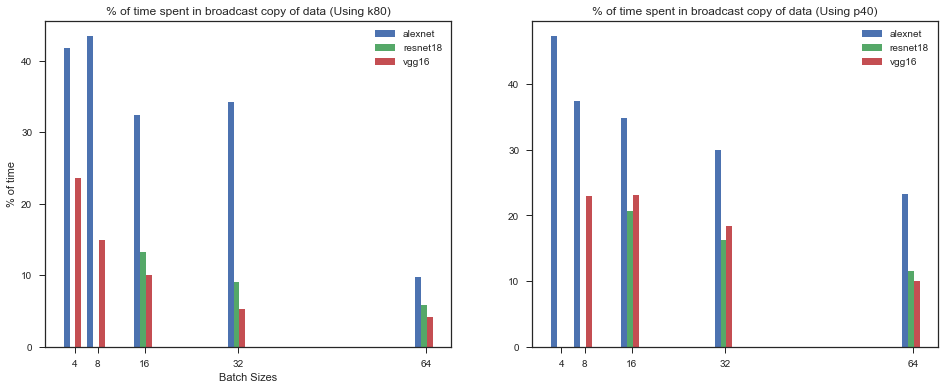

In [107]:
fig = pyplot.figure(figsize=[16,6])
plt.subplot(121)
alexnet_k80_full_broadcast_copy = np.array([41.83, 43.43, 32.36, 34.20, 9.77]).astype(np.double)  #ncclBroadcastKernel_copy_i8
resnet18_k80_full_broadcast_copy = np.array([0, 0, 13.26, 8.99, 5.87]).astype(np.double)  #ncclBroadcastKernel_copy_i8
vgg16_k80_full_broadcast_copy = np.array([23.58, 14.89, 10.10, 5.22, 4.11]).astype(np.double)  #ncclBroadcastKernel_copy_i8
pyplot.xlabel("Batch Sizes")
pyplot.ylabel("% of time")
xaxis = np.array([4,8,16,32,64]) 
colors = ['red', 'tan', 'lime']
pyplot.bar(xaxis-width, alexnet_k80_full_broadcast_copy[~np.isnan(alexnet_k80_full_broadcast_copy)], width, label='alexnet')
pyplot.bar(xaxis, resnet18_k80_full_broadcast_copy[~np.isnan(resnet18_k80_full_broadcast_copy)], width, label='resnet18')
pyplot.bar(xaxis+width, vgg16_k80_full_broadcast_copy[~np.isnan(vgg16_k80_full_broadcast_copy)], width, label='vgg16')
pyplot.xticks(xaxis+width/3,('4','8','16','32','64')) 
pyplot.legend(loc='upper right')
pyplot.title("% of time spent in broadcast copy of data (Using k80)")

plt.subplot(122)
alexnet_p40_full_broadcast_copy = [47.28, 37.47, 34.77, 29.90, 23.29] #ncclBroadcastKernel_copy_i8
resnet18_p40_full_broadcast_copy = [0, 0, 20.62, 16.24, 11.55] #ncclBroadcastKernel_copy_i8
vgg16_p40_full_broadcast_copy = [0, 22.96, 23.05, 18.43, 10.00] #ncclBroadcastKernel_copy_i8

alexnet_p40_full_broadcast_copy = np.array(alexnet_p40_full_broadcast_copy).astype(np.double) 
resnet18_p40_full_broadcast_copy = np.array(resnet18_p40_full_broadcast_copy).astype(np.double) 
vgg16_p40_full_broadcast_copy = np.array(vgg16_p40_full_broadcast_copy).astype(np.double) 


plt.bar(xaxis-width, alexnet_p40_full_broadcast_copy, width, label='alexnet')
plt.bar(xaxis, resnet18_p40_full_broadcast_copy, width, label='resnet18')
plt.bar(xaxis+width, vgg16_p40_full_broadcast_copy, width, label='vgg16')
plt.xticks(xaxis+width/3,('4','8','16','32','64')) 
plt.legend(loc='upper right')
plt.title("% of time spent in broadcast copy of data (Using p40)")
plt.show()
fig.savefig('broadcast_copy.png', dpi=fig.dpi)

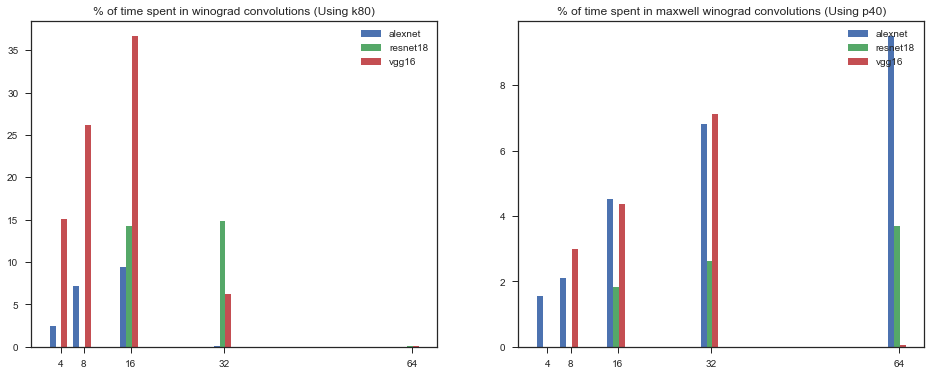

In [108]:
fig = pyplot.figure(figsize=[16,6])
plt.subplot(121)
alexnet_k80_full_winograd_implicit_3x3 = [2.40, 7.21, 9.46, 0.04, 0.01] #winograd3x3Kernel - consistent with https://arxiv.org/pdf/1509.09308.pdf
resnet18_k80_full_winograd_implicit_3x3 = [0, 0, 14.28, 14.87, 0.06] #winograd3x3Kernel (multiple ones here - with different params) - consistent with https://arxiv.org/pdf/1509.09308.pdf
vgg16_k80_full_winograd_implicit_3x3 = [15.03, 26.23, 36.67, 6.28, 0.102] #winograd3x3Kernel (multiple ones here - with different params) - consistent with https://arxiv.org/pdf/1509.09308.pdf

alexnet_k80_full_winograd_implicit_3x3 = np.array(alexnet_k80_full_winograd_implicit_3x3).astype(np.double)
resnet18_k80_full_winograd_implicit_3x3 = np.array(resnet18_k80_full_winograd_implicit_3x3).astype(np.double)
vgg16_k80_full_winograd_implicit_3x3 = np.array(vgg16_k80_full_winograd_implicit_3x3).astype(np.double)

plt.bar(xaxis-width, alexnet_k80_full_winograd_implicit_3x3, width, label='alexnet')
plt.bar(xaxis, resnet18_k80_full_winograd_implicit_3x3, width, label='resnet18')
plt.bar(xaxis+width, vgg16_k80_full_winograd_implicit_3x3, width, label='vgg16')
plt.xticks(xaxis+width/3,('4','8','16','32','64')) 
plt.legend(loc='upper right')
plt.title("% of time spent in winograd convolutions (Using k80)")



plt.subplot(122)
alexnet_p40_full_winograd_maxwell = [1.54, 2.09, 4.51, 6.80, 9.50] #maxwell_scudnn_winograd_128x128_ldg1_ldg4_tile148n_nt (grouped convolutions) - refer to https://www.researchgate.net/publication/323164864_Tensor_Comprehensions_Framework-Agnostic_High-Performance_Machine_Learning_Abstractions
resnet18_p40_full_winograd_maxwell = [None, None, 1.82, 2.62, 3.68] #winograd3x3Kernel (multiple ones here - with different params) - consistent with https://arxiv.org/pdf/1509.09308.pdf
vgg16_p40_full_winograd_maxwell = [None, 3.00, 4.37, 7.12, 0.05] #winograd3x3Kernel (multiple ones here - with different params) - consistent with https://arxiv.org/pdf/1509.09308.pdf

alexnet_p40_full_winograd_maxwell = np.array(alexnet_p40_full_winograd_maxwell).astype(np.double)
resnet18_p40_full_winograd_maxwell = np.array(resnet18_p40_full_winograd_maxwell).astype(np.double)
vgg16_p40_full_winograd_maxwell = np.array(vgg16_p40_full_winograd_maxwell).astype(np.double)


plt.bar(xaxis-width, alexnet_p40_full_winograd_maxwell, width, label='alexnet')
plt.bar(xaxis, resnet18_p40_full_winograd_maxwell, width, label='resnet18')
plt.bar(xaxis+width, vgg16_p40_full_winograd_maxwell, width, label='vgg16')
plt.xticks(xaxis+width/3,('4','8','16','32','64')) 
plt.legend(loc='upper right')
plt.title("% of time spent in maxwell winograd convolutions (Using p40)")
plt.show()
fig.savefig('winograd_implicit_3x3.png', dpi=fig.dpi)
# plt.plot(xaxis[a_mask],alexnet_k80_full_winograd_implicit_3x3[a_mask],label='alexnet',linestyle='-',marker='o')
# plt.plot(xaxis[r_mask],resnet18_k80_full_winograd_implicit_3x3[r_mask],label='resnet18',linestyle='-',marker='o')
# plt.plot(xaxis[v_mask],vgg16_k80_full_winograd_implicit_3x3[v_mask],label='vgg16',linestyle='-',marker='o')
# plt.xticks(xaxis,xticks)
# plt.xlabel('Batch Sizes')
# plt.ylabel('% of time')
# plt.title('% of time spent in winograd convolutions (Using k80)')
# plt.legend()
# fig.savefig('k80_winograd_implicit_3x3.png', dpi=fig.dpi)

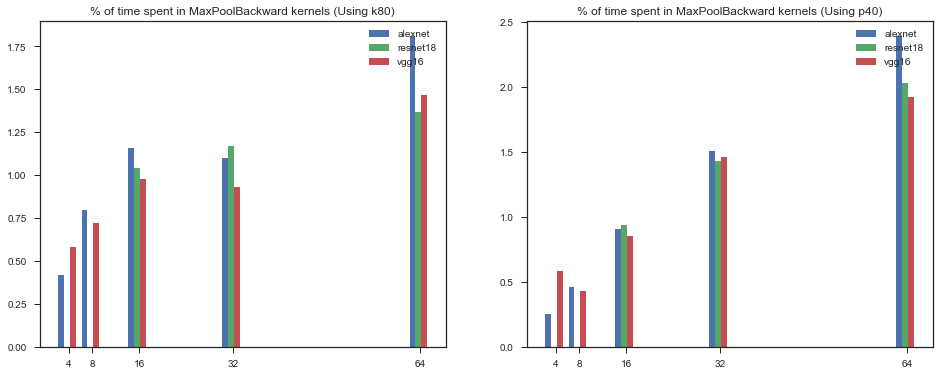

In [109]:
fig = pyplot.figure(figsize=[16,6])
plt.subplot(121)
alexnet_k80_full_MaxPoolBackward = [0.42, 0.80, 1.16, 1.10, 1.81] #MaxPoolBackward
resnet18_k80_full_MaxPoolBackward = [0, 0, 1.04, 1.17, 1.37] #MaxPoolBackward
vgg16_k80_full_MaxPoolBackward = [0.58, 0.72, 0.98, 0.93, 1.47] #MaxPoolBackward

alexnet_k80_full_MaxPoolBackward = np.array(alexnet_k80_full_MaxPoolBackward).astype(np.double)
resnet18_k80_full_MaxPoolBackward = np.array(resnet18_k80_full_MaxPoolBackward).astype(np.double)
vgg16_k80_full_MaxPoolBackward = np.array(vgg16_k80_full_MaxPoolBackward).astype(np.double)


plt.bar(xaxis-width, alexnet_k80_full_MaxPoolBackward, width, label='alexnet')
plt.bar(xaxis, resnet18_k80_full_MaxPoolBackward, width, label='resnet18')
plt.bar(xaxis+width, vgg16_k80_full_MaxPoolBackward, width, label='vgg16')
plt.xticks(xaxis+width/3,('4','8','16','32','64')) 
plt.legend(loc='upper right')
plt.title("% of time spent in MaxPoolBackward kernels (Using k80)")



plt.subplot(122)
alexnet_p40_full_MaxPoolBackward = [0.25, 0.46, 0.91, 1.51, 2.39] #MaxPoolBackward
resnet18_p40_full_MaxPoolBackward = [None, None, 0.94, 1.43, 2.03] #MaxPoolBackward
vgg16_p40_full_MaxPoolBackward = [0.58, 0.43, 0.85, 1.46, 1.92] #MaxPoolBackward

alexnet_p40_full_MaxPoolBackward = np.array(alexnet_p40_full_MaxPoolBackward).astype(np.double)
resnet18_p40_full_MaxPoolBackward = np.array(resnet18_p40_full_MaxPoolBackward).astype(np.double)
vgg16_p40_full_MaxPoolBackward = np.array(vgg16_p40_full_MaxPoolBackward).astype(np.double)



plt.bar(xaxis-width, alexnet_p40_full_MaxPoolBackward, width, label='alexnet')
plt.bar(xaxis, resnet18_p40_full_MaxPoolBackward, width, label='resnet18')
plt.bar(xaxis+width, vgg16_p40_full_MaxPoolBackward, width, label='vgg16')
plt.xticks(xaxis+width/3,('4','8','16','32','64')) 
plt.legend(loc='upper right')
plt.title("% of time spent in MaxPoolBackward kernels (Using p40)")
plt.show()
fig.savefig('MaxPoolBackward.png', dpi=fig.dpi)


# plt.plot(xaxis[a_mask],alexnet_k80_full_MaxPoolBackward[a_mask],label='alexnet',linestyle='-',marker='o')
# plt.plot(xaxis[r_mask],resnet18_k80_full_MaxPoolBackward[r_mask],label='resnet18',linestyle='-',marker='o')
# plt.plot(xaxis[v_mask],vgg16_k80_full_MaxPoolBackward[v_mask],label='vgg16',linestyle='-',marker='o')
# plt.xticks(xaxis,xticks)
# plt.xlabel('Batch Sizes')
# plt.ylabel('% of time')
# plt.title('% of time spent in MaxPoolBackward kernels (Using k80)')
# plt.legend()
# fig.savefig('k80_MaxPoolBackward.png', dpi=fig.dpi)

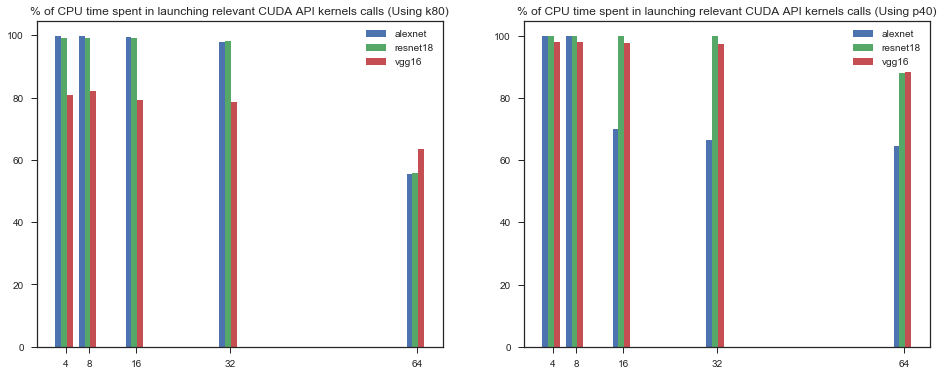

In [110]:
fig = pyplot.figure(figsize=[16,6])
plt.subplot(121)
alexnet_k80_backprop_cudaLaunchKernel = [99.65, 99.69, 99.50, 97.87, 55.42] #backprop_cudaLaunchKernel
resnet18_k80_backprop_cudaLaunchKernel = [99.12, 99.11, 99.02, 98.13, 55.93] #backprop_cudaLaunchKernel
vgg16_k80_backprop_cudaLaunchKernel = [80.91, 82.17, 79.11, 78.59, 63.60] #backprop_cudaLaunchKernel

alexnet_k80_backprop_cudaLaunchKernel = np.array(alexnet_k80_backprop_cudaLaunchKernel).astype(np.double)
resnet18_k80_backprop_cudaLaunchKernel = np.array(resnet18_k80_backprop_cudaLaunchKernel).astype(np.double)
vgg16_k80_backprop_cudaLaunchKernel = np.array(vgg16_k80_backprop_cudaLaunchKernel).astype(np.double)


plt.bar(xaxis-width, alexnet_k80_backprop_cudaLaunchKernel, width, label='alexnet')
plt.bar(xaxis, resnet18_k80_backprop_cudaLaunchKernel, width, label='resnet18')
plt.bar(xaxis+width, vgg16_k80_backprop_cudaLaunchKernel, width, label='vgg16')
plt.xticks(xaxis+width/3,('4','8','16','32','64')) 
plt.legend(loc='upper right')
plt.title("% of CPU time spent in launching relevant CUDA API kernels calls (Using k80)")



plt.subplot(122)
alexnet_p40_backprop_cudaLaunchKernel = [99.84, 99.83, 70.00, 66.61, 64.51] #backprop_cudaLaunchKernel
resnet18_p40_backprop_cudaLaunchKernel = [99.79, 99.78, 99.80, 99.79, 88.14] #backprop_cudaLaunchKernel
vgg16_p40_backprop_cudaLaunchKernel = [97.95, 97.87, 97.56, 97.34, 88.29] #backprop_cudaLaunchKernel

alexnet_p40_backprop_cudaLaunchKernel = np.array(alexnet_p40_backprop_cudaLaunchKernel).astype(np.double)
resnet18_p40_backprop_cudaLaunchKernel = np.array(resnet18_p40_backprop_cudaLaunchKernel).astype(np.double)
vgg16_p40_backprop_cudaLaunchKernel = np.array(vgg16_p40_backprop_cudaLaunchKernel).astype(np.double)



plt.bar(xaxis-width, alexnet_p40_backprop_cudaLaunchKernel, width, label='alexnet')
plt.bar(xaxis, resnet18_p40_backprop_cudaLaunchKernel, width, label='resnet18')
plt.bar(xaxis+width, vgg16_p40_backprop_cudaLaunchKernel, width, label='vgg16')
plt.xticks(xaxis+width/3,('4','8','16','32','64')) 
plt.legend(loc='upper right')
plt.title("% of CPU time spent in launching relevant CUDA API kernels calls (Using p40)")

plt.show()
fig.savefig('backprop_cudaLaunchKernel.png', dpi=fig.dpi)

# plt.plot(xaxis[a_mask],alexnet_k80_backprop_cudaLaunchKernel[a_mask],label='alexnet',linestyle='-',marker='o')
# plt.plot(xaxis[r_mask],resnet18_k80_backprop_cudaLaunchKernel[r_mask],label='resnet18',linestyle='-',marker='o')
# plt.plot(xaxis[v_mask],vgg16_k80_full_MaxPoolBackward[v_mask],label='vgg16',linestyle='-',marker='o')
# plt.xticks(xaxis,xticks)
# plt.xlabel('Batch Sizes')
# plt.ylabel('% of time')
# plt.title('% of CPU time spent in launching relevant CUDA API kernels calls (Using k80)')
# plt.legend()
# fig.savefig('k80_backprop_cudaLaunchKernel.png', dpi=fig.dpi)

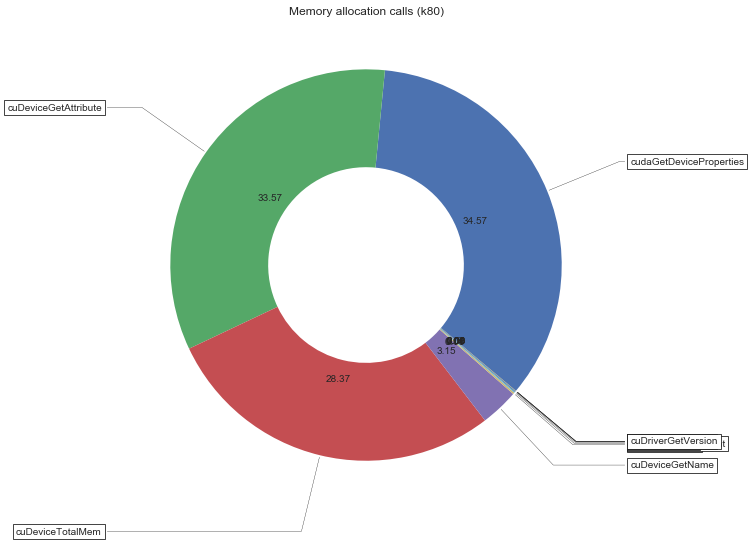

In [100]:
fig, ax = plt.subplots(figsize=(9, 9),subplot_kw=dict(aspect="equal"))

recipe = ["cudaGetDeviceProperties",
          "cuDeviceGetAttribute",
          "cuDeviceTotalMem",
          "cuDeviceGetName",
          "cudaGetDevice",
          "cudaGetDeviceCount",
          "cudaSetDevice",
          "cuDeviceGet",
          "cuDeviceGetCount",
          "cuInit",
          "cuDriverGetVersion"]

data = [34.568972, 33.571003, 28.370943, 3.150956, 0.136887, 0.084668, 0.071434, 0.027834, 0.011520, 0.003070, 0.002713]

# "API calls",34.568972,9.200413,8,1.150051,1.128660,1.186327,"cudaGetDeviceProperties"
# "API calls",33.571003,8.934807,756,0.011818,0.000213,0.499930,"cuDeviceGetAttribute"
# "API calls",28.370943,7.550829,8,0.943853,0.726052,1.233202,"cuDeviceTotalMem"
# "API calls",3.150956,0.838616,8,0.104827,0.079593,0.197219,"cuDeviceGetName"
# "API calls",0.136887,0.036432,6,0.006072,0.000784,0.028020,"cudaGetDevice"
# "API calls",0.084668,0.022534,48,0.000469,0.000169,0.006937,"cudaGetDeviceCount"
# "API calls",0.071434,0.019012,5,0.003802,0.001517,0.011547,"cudaSetDevice"
# "API calls",0.027834,0.007408,12,0.000617,0.000283,0.002480,"cuDeviceGet"
# "API calls",0.011520,0.003066,4,0.000766,0.000235,0.002019,"cuDeviceGetCount"
# "API calls",0.003070,0.000817,1,0.000817,0.000817,0.000817,"cuInit"
# "API calls",0.002713,0.000722,1,0.000722,0.000722,0.000722,"cuDriverGetVersion"


wedges, texts, _ = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, autopct='%.2f')

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Memory allocation calls (k80)")

plt.show()
fig.savefig('k80_memory_allocations.png', dpi=fig.dpi)

# p40

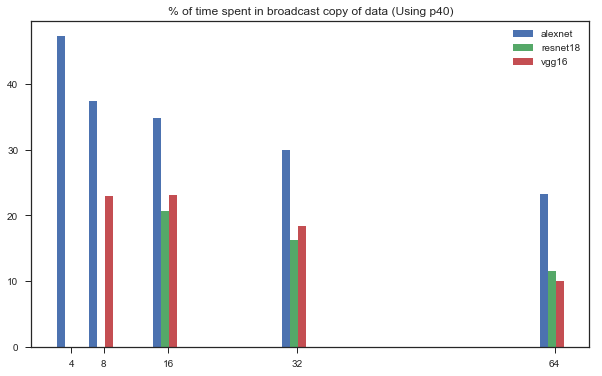

In [101]:
fig = plt.figure(figsize=[10,6])
alexnet_p40_full_broadcast_copy = [47.28, 37.47, 34.77, 29.90, 23.29] #ncclBroadcastKernel_copy_i8
resnet18_p40_full_broadcast_copy = [None, None, 20.62, 16.24, 11.55] #ncclBroadcastKernel_copy_i8
vgg16_p40_full_broadcast_copy = [None, 22.96, 23.05, 18.43, 10.00] #ncclBroadcastKernel_copy_i8

alexnet_p40_full_broadcast_copy = np.array(alexnet_p40_full_broadcast_copy).astype(np.double) 
resnet18_p40_full_broadcast_copy = np.array(resnet18_p40_full_broadcast_copy).astype(np.double) 
vgg16_p40_full_broadcast_copy = np.array(vgg16_p40_full_broadcast_copy).astype(np.double) 


plt.bar(xaxis-width, alexnet_p40_full_broadcast_copy, width, label='alexnet')
plt.bar(xaxis, resnet18_p40_full_broadcast_copy, width, label='resnet18')
plt.bar(xaxis+width, vgg16_p40_full_broadcast_copy, width, label='vgg16')
plt.xticks(xaxis+width/3,('4','8','16','32','64')) 
plt.legend(loc='upper right')
plt.title("% of time spent in broadcast copy of data (Using p40)")
plt.show()
fig.savefig('p40_broadcast_copy.png', dpi=fig.dpi)



# plt.plot(xaxis[a_mask],alexnet_p40_full_broadcast_copy[a_mask],label='alexnet',linestyle='-',marker='o')
# plt.plot(xaxis[r_mask],resnet18_p40_full_broadcast_copy[r_mask],label='resnet18',linestyle='-',marker='o')
# plt.plot(xaxis[v_mask],vgg16_p40_full_broadcast_copy[v_mask],label='vgg16',linestyle='-',marker='o')
# plt.xticks(xaxis,xticks)
# plt.xlabel('Batch Sizes')
# plt.ylabel('% of time')
# plt.title('% of time spent in broadcast copy of data (Using p40)')
# plt.legend()
# fig.savefig('p40_broadcast_copy.png', dpi=fig.dpi)

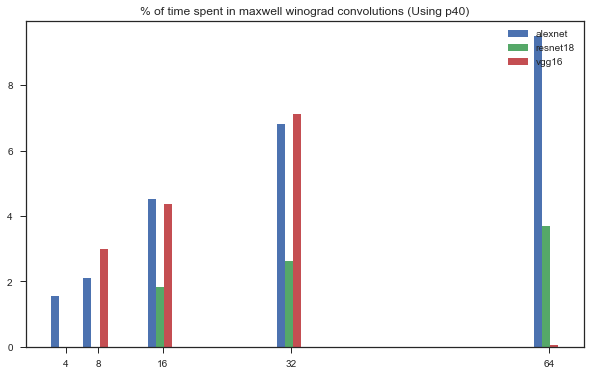

In [102]:
fig = plt.figure(figsize=[10,6])
alexnet_p40_full_winograd_maxwell = [1.54, 2.09, 4.51, 6.80, 9.50] #maxwell_scudnn_winograd_128x128_ldg1_ldg4_tile148n_nt (grouped convolutions) - refer to https://www.researchgate.net/publication/323164864_Tensor_Comprehensions_Framework-Agnostic_High-Performance_Machine_Learning_Abstractions
resnet18_p40_full_winograd_maxwell = [None, None, 1.82, 2.62, 3.68] #winograd3x3Kernel (multiple ones here - with different params) - consistent with https://arxiv.org/pdf/1509.09308.pdf
vgg16_p40_full_winograd_maxwell = [None, 3.00, 4.37, 7.12, 0.05] #winograd3x3Kernel (multiple ones here - with different params) - consistent with https://arxiv.org/pdf/1509.09308.pdf

alexnet_p40_full_winograd_maxwell = np.array(alexnet_p40_full_winograd_maxwell).astype(np.double)
resnet18_p40_full_winograd_maxwell = np.array(resnet18_p40_full_winograd_maxwell).astype(np.double)
vgg16_p40_full_winograd_maxwell = np.array(vgg16_p40_full_winograd_maxwell).astype(np.double)


plt.bar(xaxis-width, alexnet_p40_full_winograd_maxwell, width, label='alexnet')
plt.bar(xaxis, resnet18_p40_full_winograd_maxwell, width, label='resnet18')
plt.bar(xaxis+width, vgg16_p40_full_winograd_maxwell, width, label='vgg16')
plt.xticks(xaxis+width/3,('4','8','16','32','64')) 
plt.legend(loc='upper right')
plt.title("% of time spent in maxwell winograd convolutions (Using p40)")
plt.show()
fig.savefig('p40_winograd_maxwell.png', dpi=fig.dpi)



# plt.plot(xaxis[a_mask],alexnet_p40_full_winograd_maxwell[a_mask],label='alexnet',linestyle='-',marker='o')
# plt.plot(xaxis[r_mask],resnet18_p40_full_winograd_maxwell[r_mask],label='resnet18',linestyle='-',marker='o')
# plt.plot(xaxis[v_mask],vgg16_p40_full_winograd_maxwell[v_mask],label='vgg16',linestyle='-',marker='o')
# plt.xticks(xaxis,xticks)
# plt.xlabel('Batch Sizes')
# plt.ylabel('% of time')
# plt.title('% of time spent in maxwell winograd convolutions (Using p40)')
# plt.legend()
# fig.savefig('p40_winograd_maxwell.png', dpi=fig.dpi)

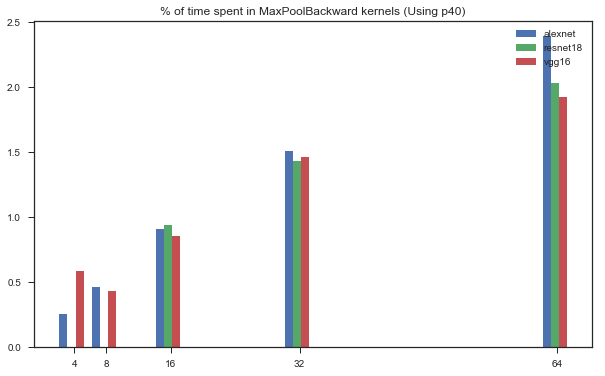

In [103]:
fig = plt.figure(figsize=[10,6])
alexnet_p40_full_MaxPoolBackward = [0.25, 0.46, 0.91, 1.51, 2.39] #MaxPoolBackward
resnet18_p40_full_MaxPoolBackward = [None, None, 0.94, 1.43, 2.03] #MaxPoolBackward
vgg16_p40_full_MaxPoolBackward = [0.58, 0.43, 0.85, 1.46, 1.92] #MaxPoolBackward

alexnet_p40_full_MaxPoolBackward = np.array(alexnet_p40_full_MaxPoolBackward).astype(np.double)
resnet18_p40_full_MaxPoolBackward = np.array(resnet18_p40_full_MaxPoolBackward).astype(np.double)
vgg16_p40_full_MaxPoolBackward = np.array(vgg16_p40_full_MaxPoolBackward).astype(np.double)



plt.bar(xaxis-width, alexnet_p40_full_MaxPoolBackward, width, label='alexnet')
plt.bar(xaxis, resnet18_p40_full_MaxPoolBackward, width, label='resnet18')
plt.bar(xaxis+width, vgg16_p40_full_MaxPoolBackward, width, label='vgg16')
plt.xticks(xaxis+width/3,('4','8','16','32','64')) 
plt.legend(loc='upper right')
plt.title("% of time spent in MaxPoolBackward kernels (Using p40)")
plt.show()
fig.savefig('p40_MaxPoolBackward.png', dpi=fig.dpi)



# plt.plot(xaxis[a_mask],alexnet_p40_full_MaxPoolBackward[a_mask],label='alexnet',linestyle='-',marker='o')
# plt.plot(xaxis[r_mask],resnet18_p40_full_MaxPoolBackward[r_mask],label='resnet18',linestyle='-',marker='o')
# plt.plot(xaxis[v_mask],vgg16_p40_full_MaxPoolBackward[v_mask],label='vgg16',linestyle='-',marker='o')
# plt.xticks(xaxis,xticks)
# plt.xlabel('Batch Sizes')
# plt.ylabel('% of time')
# plt.title('% of time spent in MaxPoolBackward kernels (Using p40)')
# plt.legend()
# fig.savefig('p40_MaxPoolBackward.png', dpi=fig.dpi)

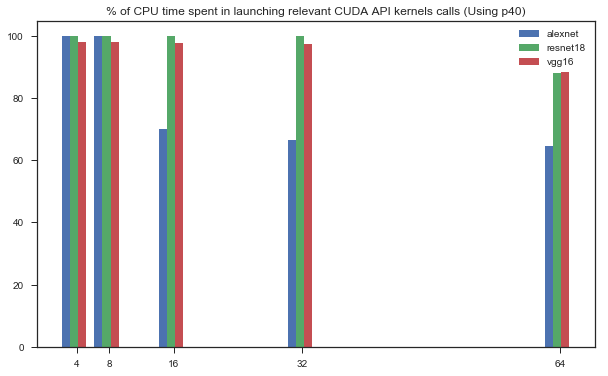

In [104]:
fig = plt.figure(figsize=[10,6])
alexnet_p40_backprop_cudaLaunchKernel = [99.84, 99.83, 70.00, 66.61, 64.51] #backprop_cudaLaunchKernel
resnet18_p40_backprop_cudaLaunchKernel = [99.79, 99.78, 99.80, 99.79, 88.14] #backprop_cudaLaunchKernel
vgg16_p40_backprop_cudaLaunchKernel = [97.95, 97.87, 97.56, 97.34, 88.29] #backprop_cudaLaunchKernel

alexnet_p40_backprop_cudaLaunchKernel = np.array(alexnet_p40_backprop_cudaLaunchKernel).astype(np.double)
resnet18_p40_backprop_cudaLaunchKernel = np.array(resnet18_p40_backprop_cudaLaunchKernel).astype(np.double)
vgg16_p40_backprop_cudaLaunchKernel = np.array(vgg16_p40_backprop_cudaLaunchKernel).astype(np.double)



plt.bar(xaxis-width, alexnet_p40_backprop_cudaLaunchKernel, width, label='alexnet')
plt.bar(xaxis, resnet18_p40_backprop_cudaLaunchKernel, width, label='resnet18')
plt.bar(xaxis+width, vgg16_p40_backprop_cudaLaunchKernel, width, label='vgg16')
plt.xticks(xaxis+width/3,('4','8','16','32','64')) 
plt.legend(loc='upper right')
plt.title("% of CPU time spent in launching relevant CUDA API kernels calls (Using p40)")
plt.show()
fig.savefig('p40_backprop_cudaLaunchKernel.png', dpi=fig.dpi)


# plt.plot(xaxis[a_mask],alexnet_p40_backprop_cudaLaunchKernel[a_mask],label='alexnet',linestyle='-',marker='o')
# plt.plot(xaxis[r_mask],resnet18_p40_backprop_cudaLaunchKernel[r_mask],label='resnet18',linestyle='-',marker='o')
# plt.plot(xaxis[v_mask],vgg16_p40_full_MaxPoolBackward[v_mask],label='vgg16',linestyle='-',marker='o')
# plt.xticks(xaxis,xticks)
# plt.xlabel('Batch Sizes')
# plt.ylabel('% of time')
# plt.title('% of CPU time spent in launching relevant CUDA API kernels calls (Using p40)')
# plt.legend()
# fig.savefig('p40_backprop_cudaLaunchKernel.png', dpi=fig.dpi)

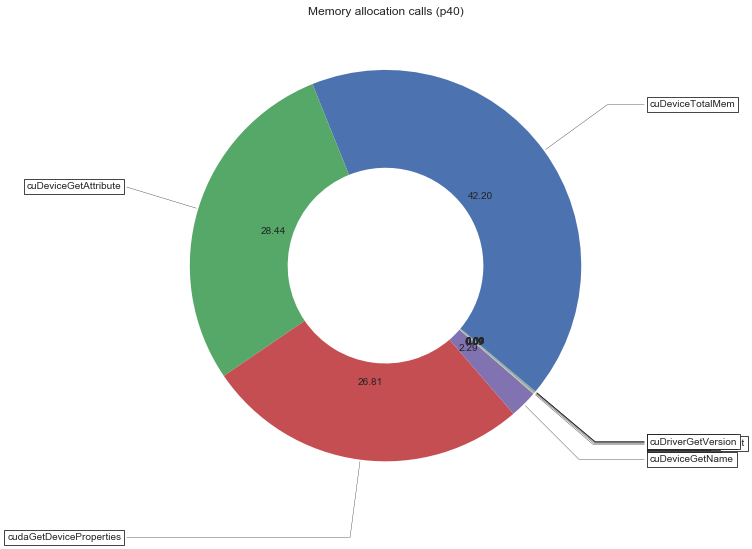

In [105]:
fig, ax = plt.subplots(figsize=(9, 9),subplot_kw=dict(aspect="equal"))

recipe = ["cuDeviceTotalMem",
          "cuDeviceGetAttribute",
          "cudaGetDeviceProperties",
          "cuDeviceGetName",
          "cudaGetDevice",
          "cudaGetDeviceCount",
          "cudaSetDevice",
          "cuDeviceGet",
          "cuDeviceGetCount",
          "cuInit",
          "cuDriverGetVersion"]

data = [42.200842, 28.439267, 26.811765, 2.292397, 0.093838, 0.071434, 0.043023, 0.025919, 0.013136, 0.004376, 0.004103]

# "API calls",42.200842,13.145824,8,1.643228,1.367245,1.766299,"cuDeviceTotalMem"
# "API calls",28.439267,8.859008,756,0.011718,0.000247,0.520220,"cuDeviceGetAttribute"
# "API calls",26.811765,8.352031,8,1.044003,0.946552,1.086822,"cudaGetDeviceProperties"
# "API calls",2.292397,0.714096,8,0.089262,0.079410,0.102441,"cuDeviceGetName"
# "API calls",0.093838,0.029231,6,0.004871,0.000520,0.023046,"cudaGetDevice"
# "API calls",0.071334,0.022221,48,0.000462,0.000187,0.004514,"cudaGetDeviceCount"
# "API calls",0.043023,0.013402,5,0.002680,0.000936,0.008942,"cudaSetDevice"
# "API calls",0.025919,0.008074,12,0.000672,0.000315,0.004036,"cuDeviceGet"
# "API calls",0.013136,0.004092,4,0.001023,0.000331,0.002830,"cuDeviceGetCount"
# "API calls",0.004376,0.001363,1,0.001363,0.001363,0.001363,"cuInit"
# "API calls",0.004103,0.001278,1,0.001278,0.001278,0.001278,"cuDriverGetVersion"

wedges, texts, _ = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, autopct='%.2f')

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Memory allocation calls (p40)")

plt.show()
fig.savefig('p40_memory_allocations.png', dpi=fig.dpi)

# Comparison

NameError: name 'resnet_k80_full_broadcast_copy' is not defined

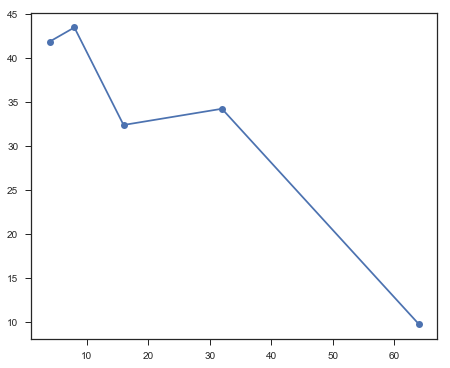

In [106]:
fig = plt.figure(figsize=[16,6])

plt.subplot(121)
alexnet_k80_full_broadcast_copy = [41.83, 43.43, 32.36, 34.20, 9.77] #ncclBroadcastKernel_copy_i8
resnet18_k80_full_broadcast_copy = [None, None, 13.26, 8.99, 5.87] #ncclBroadcastKernel_copy_i8
vgg16_k80_full_broadcast_copy = [23.58, 14.89, 10.10, 5.22, 4.11] #ncclBroadcastKernel_copy_i8
alexnet_k80_full_broadcast_copy = np.array(alexnet_k80_full_broadcast_copy).astype(np.double) 
a_mask = np.isfinite(alexnet_k80_full_broadcast_copy)
resnet18_k80_full_broadcast_copy = np.array(resnet18_k80_full_broadcast_copy).astype(np.double) 
r_mask = np.isfinite(resnet18_k80_full_broadcast_copy)
vgg16_k80_full_broadcast_copy = np.array(vgg16_k80_full_broadcast_copy).astype(np.double) 
v_mask = np.isfinite(vgg16_k80_full_broadcast_copy)
plt.plot(xaxis[a_mask],alexnet_k80_full_broadcast_copy[a_mask],label='alexnet',linestyle='-',marker='o')
plt.plot(xaxis[r_mask],resnet_k80_full_broadcast_copy[r_mask],label='resnet18',linestyle='-',marker='o')
plt.plot(xaxis[v_mask],vgg16_k80_full_broadcast_copy[v_mask],label='vgg16',linestyle='-',marker='o')
plt.xticks(xaxis,xticks)
plt.xlabel('Batch Sizes')
plt.ylabel('% of time')
plt.title('% of time spent in broadcast copy of data (Using k80)')
plt.legend()

plt.subplot(122)
alexnet_p40_full_broadcast_copy = [47.28, 37.47, 34.77, 29.90, 23.29] #ncclBroadcastKernel_copy_i8
resnet18_p40_full_broadcast_copy = [None, None, 20.62, 16.24, 11.55] #ncclBroadcastKernel_copy_i8
vgg16_p40_full_broadcast_copy = [None, 22.96, 23.05, 18.43, 10.00] #ncclBroadcastKernel_copy_i8
alexnet_p40_full_broadcast_copy = np.array(alexnet_p40_full_broadcast_copy).astype(np.double) 
a_mask = np.isfinite(alexnet_p40_full_broadcast_copy)
resnet18_p40_full_broadcast_copy = np.array(resnet18_p40_full_broadcast_copy).astype(np.double) 
r_mask = np.isfinite(resnet18_p40_full_broadcast_copy)
vgg16_p40_full_broadcast_copy = np.array(vgg16_p40_full_broadcast_copy).astype(np.double) 
v_mask = np.isfinite(vgg16_p40_full_broadcast_copy)
plt.plot(xaxis[a_mask],alexnet_p40_full_broadcast_copy[a_mask],label='alexnet',linestyle='-',marker='o')
plt.plot(xaxis[r_mask],resnet18_p40_full_broadcast_copy[r_mask],label='resnet18',linestyle='-',marker='o')
plt.plot(xaxis[v_mask],vgg16_p40_full_broadcast_copy[v_mask],label='vgg16',linestyle='-',marker='o')
plt.xticks(xaxis,xticks)
plt.xlabel('Batch Sizes')
plt.ylabel('% of time')
plt.title('% of time spent in broadcast copy of data (Using p40)')
plt.legend()

plt.show()
fig.savefig('k80_vs_p40_broadcast_copy.png', dpi=fig.dpi)

In [ ]:
fig = plt.figure(figsize=[16,6])

plt.subplot(121)
alexnet_k80_full_winograd_implicit_3x3 = [2.40, 7.21, 9.46, 0.04, 0.01] #winograd3x3Kernel - consistent with https://arxiv.org/pdf/1509.09308.pdf
resnet18_k80_full_winograd_implicit_3x3 = [None, None, 14.28, 14.87, 0.06] #winograd3x3Kernel (multiple ones here - with different params) - consistent with https://arxiv.org/pdf/1509.09308.pdf
vgg16_k80_full_winograd_implicit_3x3 = [15.03, 26.23, 36.67, 6.28, 0.102] #winograd3x3Kernel (multiple ones here - with different params) - consistent with https://arxiv.org/pdf/1509.09308.pdf
alexnet_k80_full_winograd_implicit_3x3 = np.array(alexnet_k80_full_winograd_implicit_3x3).astype(np.double)
a_mask = np.isfinite(alexnet_k80_full_winograd_implicit_3x3)
resnet18_k80_full_winograd_implicit_3x3 = np.array(resnet18_k80_full_winograd_implicit_3x3).astype(np.double)
r_mask = np.isfinite(resnet18_k80_full_winograd_implicit_3x3)
vgg16_k80_full_winograd_implicit_3x3 = np.array(vgg16_k80_full_winograd_implicit_3x3).astype(np.double)
v_mask = np.isfinite(vgg16_k80_full_winograd_implicit_3x3)
plt.plot(xaxis[a_mask],alexnet_k80_full_winograd_implicit_3x3[a_mask],label='alexnet',linestyle='-',marker='o')
plt.plot(xaxis[r_mask],resnet18_k80_full_winograd_implicit_3x3[r_mask],label='resnet18',linestyle='-',marker='o')
plt.plot(xaxis[v_mask],vgg16_k80_full_winograd_implicit_3x3[v_mask],label='vgg16',linestyle='-',marker='o')
plt.xticks(xaxis,xticks)
plt.xlabel('Batch Sizes')
plt.ylabel('% of time')
plt.title('% of time spent in winograd convolutions (Using k80)')
plt.legend()

plt.subplot(122)
alexnet_p40_full_winograd_maxwell = [1.54, 2.09, 4.51, 6.80, 9.50] #maxwell_scudnn_winograd_128x128_ldg1_ldg4_tile148n_nt (grouped convolutions) - refer to https://www.researchgate.net/publication/323164864_Tensor_Comprehensions_Framework-Agnostic_High-Performance_Machine_Learning_Abstractions
resnet18_p40_full_winograd_maxwell = [None, None, 1.82, 2.62, 3.68] #maxwell_scudnn_winograd_128x128_ldg1_ldg4_tile148n_nt (grouped convolutions) - refer to https://www.researchgate.net/publication/323164864_Tensor_Comprehensions_Framework-Agnostic_High-Performance_Machine_Learning_Abstractions
vgg16_p40_full_winograd_maxwell = [None, 3.00, 4.37, 7.12, 0.05] #maxwell_scudnn_winograd_128x128_ldg1_ldg4_tile148n_nt (grouped convolutions) - refer to https://www.researchgate.net/publication/323164864_Tensor_Comprehensions_Framework-Agnostic_High-Performance_Machine_Learning_Abstractions
alexnet_p40_full_winograd_maxwell = np.array(alexnet_p40_full_winograd_maxwell).astype(np.double)
a_mask = np.isfinite(alexnet_p40_full_winograd_maxwell)
resnet18_p40_full_winograd_maxwell = np.array(resnet18_p40_full_winograd_maxwell).astype(np.double)
r_mask = np.isfinite(resnet18_p40_full_winograd_maxwell)
vgg16_p40_full_winograd_maxwell = np.array(vgg16_p40_full_winograd_maxwell).astype(np.double)
v_mask = np.isfinite(vgg16_p40_full_winograd_maxwell)
plt.plot(xaxis[a_mask],alexnet_p40_full_winograd_maxwell[a_mask],label='alexnet',linestyle='-',marker='o')
plt.plot(xaxis[r_mask],resnet18_p40_full_winograd_maxwell[r_mask],label='resnet18',linestyle='-',marker='o')
plt.plot(xaxis[v_mask],vgg16_p40_full_winograd_maxwell[v_mask],label='vgg16',linestyle='-',marker='o')
plt.xticks(xaxis,xticks)
plt.xlabel('Batch Sizes')
plt.ylabel('% of time')
plt.title('% of time spent in maxwell winograd convolutions (Using p40)')
plt.legend()

plt.show()
fig.savefig('k80_vs_p40_winograd.png', dpi=fig.dpi)

In [ ]:
fig = plt.figure(figsize=[16,6])

plt.subplot(121)
alexnet_k80_full_MaxPoolBackward = [0.42, 0.80, 1.16, 1.10, 1.81] #MaxPoolBackward
resnet18_k80_full_MaxPoolBackward = [None, None, 1.04, 1.17, 1.37] #MaxPoolBackward
vgg16_k80_full_MaxPoolBackward = [0.58, 0.72, 0.98, 0.93, 1.47] #MaxPoolBackward
alexnet_k80_full_MaxPoolBackward = np.array(alexnet_k80_full_MaxPoolBackward).astype(np.double)
a_mask = np.isfinite(alexnet_k80_full_MaxPoolBackward)
resnet18_k80_full_MaxPoolBackward = np.array(resnet18_k80_full_MaxPoolBackward).astype(np.double)
r_mask = np.isfinite(resnet18_k80_full_MaxPoolBackward)
vgg16_k80_full_MaxPoolBackward = np.array(vgg16_k80_full_MaxPoolBackward).astype(np.double)
v_mask = np.isfinite(vgg16_k80_full_MaxPoolBackward)
plt.plot(xaxis[a_mask],alexnet_k80_full_MaxPoolBackward[a_mask],label='alexnet',linestyle='-',marker='o')
plt.plot(xaxis[r_mask],resnet18_k80_full_MaxPoolBackward[r_mask],label='resnet18',linestyle='-',marker='o')
plt.plot(xaxis[v_mask],vgg16_k80_full_MaxPoolBackward[v_mask],label='vgg16',linestyle='-',marker='o')
plt.xticks(xaxis,xticks)
plt.xlabel('Batch Sizes')
plt.ylabel('% of time')
plt.title('% of time spent in MaxPoolBackward kernels (Using k80)')
plt.legend()

plt.subplot(122)
alexnet_p40_full_MaxPoolBackward = [0.25, 0.46, 0.91, 1.51, 2.39] #MaxPoolBackward
resnet18_p40_full_MaxPoolBackward = [None, None, 0.94, 1.43, 2.03] #MaxPoolBackward
vgg16_p40_full_MaxPoolBackward = [0.58, 0.43, 0.85, 1.46, 1.92] #MaxPoolBackward
alexnet_p40_full_MaxPoolBackward = np.array(alexnet_p40_full_MaxPoolBackward).astype(np.double)
a_mask = np.isfinite(alexnet_p40_full_MaxPoolBackward)
resnet18_p40_full_MaxPoolBackward = np.array(resnet18_p40_full_MaxPoolBackward).astype(np.double)
r_mask = np.isfinite(resnet18_p40_full_MaxPoolBackward)
vgg16_p40_full_MaxPoolBackward = np.array(vgg16_p40_full_MaxPoolBackward).astype(np.double)
v_mask = np.isfinite(vgg16_p40_full_MaxPoolBackward)
plt.plot(xaxis[a_mask],alexnet_p40_full_MaxPoolBackward[a_mask],label='alexnet',linestyle='-',marker='o')
plt.plot(xaxis[r_mask],resnet18_p40_full_MaxPoolBackward[r_mask],label='resnet18',linestyle='-',marker='o')
plt.plot(xaxis[v_mask],vgg16_p40_full_MaxPoolBackward[v_mask],label='vgg16',linestyle='-',marker='o')
plt.xticks(xaxis,xticks)
plt.xlabel('Batch Sizes')
plt.ylabel('% of time')
plt.title('% of time spent in MaxPoolBackward kernels (Using p40)')
plt.legend()

plt.show()
fig.savefig('k80_vs_p40_MaxPoolBackward.png', dpi=fig.dpi)